In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(color_codes=True)
sns.set_style('darkgrid')
# sns.set_style('whitegrid')
%matplotlib inline

In [189]:
# Reading the CSV data file
file = 'Data\Data_24032020.csv' # Put the update CSV file here
date = '24_03_2020' # Update the data as well
raw_data = pd.read_csv(file)

In [190]:
#  Takes the names of Brazilian states ant the counting days per state
states = []
days_per_state = []
region_label = []
t = 0

for i in np.arange(0, len(raw_data['state']) - 1):
    
    if raw_data['state'][i] != raw_data['state'][i + 1]:
        states = states + [raw_data['state'].iloc[i]]
        region_label = region_label + [raw_data['region'].iloc[i]]
        days_per_state = days_per_state + [t]
        t = 0
        
    t += 1

In [191]:
# Creates the structure of the dataframe to be plotted
total_cases = np.empty((len(states), np.max(days_per_state)))
total_cases[:] = np.NaN
new_cases = np.empty((len(states), np.max(days_per_state)))
new_cases[:] = np.NaN

row = 0

for i in np.arange(0, len(raw_data['state']) - 1):
    if row < len(states):
        total_cases[row, col] = raw_data['totalCases'][i]
        new_cases[row, col] = raw_data['newCases'][i]
        col += 1
    if raw_data['state'][i] != raw_data['state'][i + 1]:
        col = 0
        row += 1
        
        
new_data = pd.DataFrame(data = new_cases, index = states)
total_data = pd.DataFrame(data = total_cases, index = states)

regions = pd.DataFrame(region_label, columns = ['Region'], index = states)
new_data = new_data.join(regions);
total_data = total_data.join(regions)

In [192]:
# Takes the total and new numbers for Brazil

BR_total = np.empty(np.max(days_per_state)) # Total cases in Brazil for each day
BR_total[:] = np.NaN
BR_new = np.empty(np.max(days_per_state)) # New cases in Brazil for each day
BR_new[:] = np.NaN

c = 0

for i in np.arange(0, len(raw_data['state'])):
    if raw_data['state'][i] == 'TOTAL':
        BR_total[c] = raw_data['totalCases'][i]
        BR_new[c] = raw_data['newCases'][i]
        c += 1
        
BR_total = pd.Series(BR_total)
BR_new = pd.Series(BR_new)

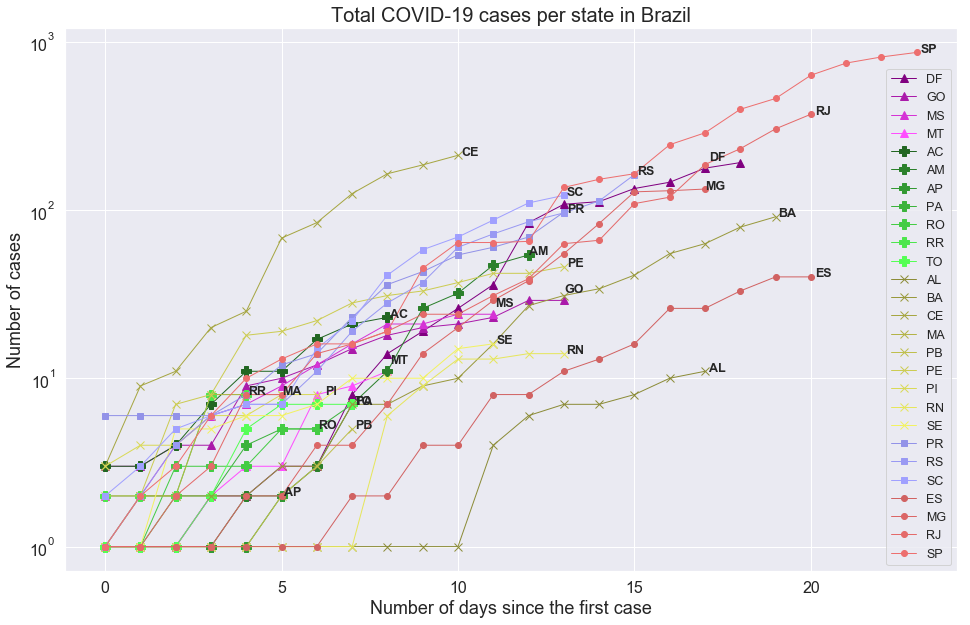

In [99]:
# Plotting the total number per state

fig1 = plt.figure(figsize = (16, 10))

for k in range(0, len(states)):
    if total_data['Region'][k] == 'Central':
        color_central = ((k+3)/6, k/10, (k+3)/6)
        plt.plot(total_data.iloc[k, range(0, total_data.shape[1] - 1)], '-^', color = color_central, 
                 markersize = 8, linewidth = 1) 
        plt.annotate(total_data.index[k], (days_per_state[k], total_data.iloc[k, days_per_state[k] - 1]), 
                    textcoords = 'offset points', xytext=(-15, 8), ha='right', fontsize = 12.5, weight = 'bold')
    
    if total_data['Region'][k] == 'North':
        color_north = (k/30, k/10, k/30)
        plt.plot(total_data.iloc[k, range(0, total_data.shape[1] - 1)], '-P', color = color_north, 
                 markersize = 10, linewidth = 1)
        plt.annotate(total_data.index[k], (days_per_state[k], total_data.iloc[k, days_per_state[k] - 1]), 
                    textcoords = 'offset points', xytext=(-15, 0), ha='right', fontsize = 12.5, weight = 'bold')
        
    if total_data['Region'][k] == 'Northeast':
        color_northeast = (k/20, k/20, k/50)
        plt.plot(total_data.iloc[k, range(0, total_data.shape[1] - 1)], '-x', color = color_northeast, 
                 markersize = 8, linewidth = 1)
        plt.annotate(total_data.index[k], (days_per_state[k], total_data.iloc[k, days_per_state[k] - 1]), 
                    textcoords = 'offset points', xytext=(-15, 0), ha='right', fontsize = 12.5, weight = 'bold')
        
    if total_data['Region'][k] == 'South':
        color_south = (k/35, k/35, k/22)
        plt.plot(total_data.iloc[k, range(0, total_data.shape[1] - 1)], '-s', color = color_south, 
                 markersize = 6, linewidth = 1)
        plt.annotate(total_data.index[k], (days_per_state[k], total_data.iloc[k, days_per_state[k] - 1]), 
                    textcoords = 'offset points', xytext=(-15, 0), ha='right', fontsize = 12.5, weight = 'bold')
        
    if total_data['Region'][k] == 'Southeast':
        color_southeast = (k/28, k/60, k/60)
        plt.plot(total_data.iloc[k, range(0, total_data.shape[1] - 1)], '-o', color = color_southeast,
                 markersize = 6, linewidth = 1)
        plt.annotate(total_data.index[k], (days_per_state[k], total_data.iloc[k, days_per_state[k] - 1]), 
                    textcoords = 'offset points', xytext=(-15, 0), ha='right', fontsize = 12.5, weight = 'bold')

plt.yscale('log')
plt.ylabel('Number of cases', Fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Number of days since the first case', Fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Total COVID-19 cases per state in Brazil', FontSize = 20)
plt.legend(fontsize = 12.5)

plt.show()
fig1.savefig('Figures\\' + date + '\\Total_COVID19_cases_per_state_in_Brazil.png', dpi = 400)

In [67]:
# Analysis of COVID-19 in each Brazilian state

for s in range(0, len(states)):

#     int_state = 'SP' # Choose the state here
    int_state = states[s]
    
    for k in range(0, len(total_data.index)):
        if total_data.index[k] == int_state:
            total_state = total_data.iloc[k, :]
            total_state = total_state.drop(labels = 'Region')
            new_state = new_data.iloc[k, :]
            new_state = new_state.drop(labels = 'Region')
            break
        
    fig2 = plt.figure(figsize = (16, 10))

    plt.plot(total_state, 'ko-', label = 'Total cases', linewidth = 1, markersize = 12)
    plt.bar(np.arange(0, days_per_state[k] + 1, 1), new_state[np.arange(0, days_per_state[k] + 1)], 
            width = .8, color = 'b', label = 'New cases')

    plt.yscale('log')
    plt.ylabel('Number of cases', Fontsize = 18)
    plt.yticks(fontsize = 16)
    plt.xlabel('Number of days since the first case', Fontsize = 18)
    plt.xticks(np.arange(0, days_per_state[k]), fontsize = 16)
    plt.title('COVID-19 cases in ' + int_state, FontSize = 20)
    plt.legend(fontsize = 16)

    fig2.savefig('Figures\\' + date + '\\For_each_state\\COVID19_cases_per_in_' + int_state + '.png', dpi = 400)
#     plt.show()
    plt.close()

In [ ]:
# Comparing states with Brazil

for s in range(0, len(states)):

    # int_state = 'MG' # Choose the state here
    int_state = states[s]

    for k in range(0, len(total_data.index)):
        if total_data.index[k] == int_state:
            total_state = total_data.iloc[k, :]
            total_state = total_state.drop(labels = 'Region')
            new_state = new_data.iloc[k, :]
            new_state = new_state.drop(labels = 'Region')
            break

    fig2 = plt.figure(figsize = (16, 10))

    w = .2 # Shift for the bar plots
    n = len(BR_total.index)
    x1 = np.arange(0, days_per_state[k] + 1, 1)
    x2 = np.arange(0, len(BR_total) + 1, 1)

    plt.plot(total_state, 'ko-', label = 'Total cases in ' + int_state, linewidth = 1, markersize = 12)
    plt.plot(BR_total, 'go-', label = 'Total cases in Brazil', linewidth = 1, markersize = 12)
    plt.plot(BR_total - total_state, 'ro-', label = 'Total cases - Difference', linewidth = 1, markersize = 12)
    plt.bar(x1, new_state[np.arange(0, days_per_state[k] + 1)], width = .2, color = 'k', label = 'New cases in ' + int_state)
    plt.bar(x2 - w, BR_new[np.arange(0, n + 1)], width = .2, color = 'g', label = 'New cases in Brazil')
    plt.bar(x2 + w, BR_new[np.arange(0, n + 1)] - new_state[np.arange(0, days_per_state[k] + 1)], width = .2, 
            color = 'r', label = 'New cases - Difference')

    plt.yscale('log')
    plt.ylabel('Number of cases', Fontsize = 18)
    plt.yticks(fontsize = 16)
    plt.xlabel('Number of days since the first case', Fontsize = 18)
    plt.xticks(np.arange(0, days_per_state[k]), fontsize = 16)
    plt.title('COVID-19 cases compared between ' + int_state + ' and Brazil', FontSize = 20)
    plt.legend(fontsize = 16)

    fig2.savefig('Figures\\' + date + '\\Compared_with_BR\\COVID19_cases_compared_between_BR_and_' + int_state + '.png', dpi = 400)
    # plt.show()
    plt.close()

In [68]:
# Comparing states with SP

for s in range(0, len(states)):

    int_state1 = 'SP' # Choose the state1 here
#     int_state2 = 'RJ' # Choose the state2 here
    int_state2 = states[s]
    
    if 'SP' in int_state2 == True:
        s += 1
        continue

    for k in range(0, len(total_data.index)):
        if total_data.index[k] == int_state1:
            total_state1 = total_data.iloc[k, :]
            total_state1 = total_state1.drop(labels = 'Region')
            new_state1 = new_data.iloc[k, :]
            new_state1 = new_state1.drop(labels = 'Region')
            n1 = k
        if total_data.index[k] == int_state2:
            total_state2 = total_data.iloc[k, :]
            total_state2 = total_state2.drop(labels = 'Region')
            new_state2 = new_data.iloc[k, :]
            new_state2 = new_state2.drop(labels = 'Region')
            n2 = k

    x1 = np.arange(0, days_per_state[n1] + 1, 1)
    x2 = np.arange(0, days_per_state[n2] + 1, 1)

    fig3 = plt.figure(figsize = (16, 10))

    w = .2 # Shift for the bar plots

    plt.plot(total_state1, 'ko-', label = 'Total cases in ' + int_state1, linewidth = 1, markersize = 12)
    plt.plot(total_state2, 'bs-', label = 'Total cases in ' + int_state2, linewidth = 1, markersize = 12)
    plt.bar(x1 - w, new_state1[np.arange(0, days_per_state[n1] + 1)], width = .4, color = 'k', 
            label = 'New cases in ' + int_state1)
    plt.bar(x2  + w, new_state2[np.arange(0, days_per_state[n2] + 1)], width = .4, color = 'b', 
            label = 'New cases in ' + int_state2)

    plt.yscale('log')
    plt.ylabel('Number of cases', Fontsize = 18)
    plt.yticks(fontsize = 16)
    plt.xlabel('Number of days since the first case', Fontsize = 18)
    plt.xticks(np.arange(0, days_per_state[k]), fontsize = 16)
    plt.title('COVID-19 cases compared between ' + int_state1 + ' and ' + int_state2, FontSize = 20)
    plt.legend(fontsize = 16)

    fig3.savefig('Figures\\' + date + '\\Compared_with_SP\\COVID19_cases_compared_between_' + int_state1 + '_and_' + int_state2 + '.png', dpi = 400)
#     plt.show()
    plt.close()